In [ ]:
Problem Definition
Define the problem: Recommending songs to users based on their preferences (genres, artists, or other song features).

Target Audience: Music listeners who want to discover new music based on their current tastes.

In [6]:
# Step 2: Data Collection

import pandas as pd

# Loading the dataset
print("Loading dataset...")
df = pd.read_csv("C:/Users/Asus/Desktop/New folder/MusicRecommendationSystem/model/dataset.csv")

# Check the first few rows of the data
print("\nStep 2: Dataset loaded successfully! Here are the first few rows:")
print(df.head())


Loading dataset...

Step 2: Dataset loaded successfully! Here are the first few rows:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       14

In [7]:
# Step 3: Data Understanding

# 3.1 Checking for missing values
print("\nStep 3.1: Checking for missing values in the dataset...")
missing_values = df.isnull().sum()
print(missing_values)

# 3.2 Checking column names
print("\nStep 3.2: Checking the column names of the dataset...")
columns = df.columns
print(columns)

# 3.3 Checking datatypes of columns
print("\nStep 3.3: Checking the datatypes of the columns...")
df_info = df.info()

# 3.4 Summary statistics for numerical columns
print("\nStep 3.4: Basic statistics of numerical columns...")
df_stats = df.describe()
print(df_stats)



Step 3.1: Checking for missing values in the dataset...
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Step 3.2: Checking the column names of the dataset...
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Step 3.3: Checking the datatypes of the columns...
<class 'pandas.core.frame.Da

In [8]:
# Step 4: Data Preparation

from sklearn.preprocessing import StandardScaler

# 4.1 Handling missing values
print("\nStep 4.1: Handling missing values...")
df['danceability'].fillna(df['danceability'].median(), inplace=True)
df['energy'].fillna(df['energy'].median(), inplace=True)

# 4.2 Feature scaling (Standardizing numerical features)
print("\nStep 4.2: Feature scaling...")
scaler = StandardScaler()
numerical_columns = ['danceability', 'energy']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 4.3 Checking the cleaned data
print("\nStep 4.3: Checking cleaned data...")
print(df.head())



Step 4.1: Handling missing values...

Step 4.2: Feature scaling...

Step 4.3: Checking cleaned data...
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic   

C:\Users\sanskar\AppData\Local\Temp\ipykernel_17708\2207659715.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['danceability'].fillna(df['danceability'].median(), inplace=True)
C:\Users\sanskar\AppData\Local\Temp\ipykernel_17708\2207659715.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

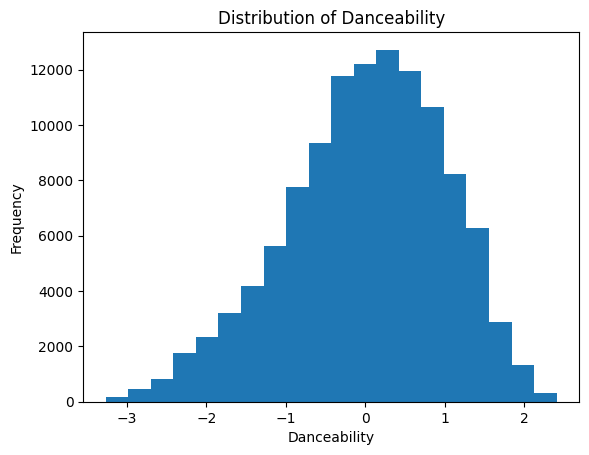

In [9]:
# Step 5: Data Exploration (Optional)

import matplotlib.pyplot as plt

# Example: Plotting a histogram of 'danceability'
plt.hist(df['danceability'], bins=20)
plt.title("Distribution of Danceability")
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Step 6: Model Building

from sklearn.neighbors import NearestNeighbors

# 6.1 Preparing the feature matrix for the recommendation model
print("\nStep 6.1: Preparing the feature matrix for recommendation...")
X = df[['danceability', 'energy']]

# 6.2 Fitting the NearestNeighbors model
print("\nStep 6.2: Fitting NearestNeighbors model...")
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
model.fit(X)


Step 6.1: Preparing the feature matrix for recommendation...

Step 6.2: Fitting NearestNeighbors model...


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [11]:
# Step 7: Model Evaluation

# Example: Evaluating the model's recommendation
def recommend(song_title):
    song_index = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(song_index) == 0:
        print(f"No song found with title: {song_title}")
        return []
    
    song_index = song_index[0]
    distances, indices = model.kneighbors([X.iloc[song_index]], n_neighbors=6)
    
    recommendations = []
    for i in indices[0][1:]:
        rec_song = df.iloc[i]
        recommendations.append({
            'title': rec_song['track_name'],
            'artists': rec_song['artists'],
            'popularity': rec_song['popularity'],
            'danceability': rec_song['danceability'],
            'energy': rec_song['energy'],
        })
    return recommendations

# Evaluating the recommendation for a song (example)
song_title = "Shape of You"  # Example song
recommendations = recommend(song_title)

# Print the recommendations
print("\nStep 7: Recommended songs:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec['title']} by {rec['artists']} - Popularity: {rec['popularity']}")



Step 7: Recommended songs:
1. Not Myself Today by Heidi Blickenstaff;Emma Hunton;Ann Harada;Company - Freaky Friday: A New Musical - Popularity: 22
2. st. mark’s place by really big mountains - Popularity: 26
3. K同學 - Live by my little airport - Popularity: 30
4. Little Bit Broken by The Wood Brothers - Popularity: 29
5. Here in My Life by Sweet Little Band - Popularity: 30


C:\Users\sanskar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [12]:
# Step 8: Model Deployment (Optional)

import pickle

# 8.1 Save the model and scaler
print("\nStep 8.1: Saving the model...")
with open('music_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



Step 8.1: Saving the model...


In [13]:
# Step 9: Model Retraining (Optional)

# 9.1 Load the saved model
print("\nStep 9.1: Loading the saved model...")
with open('music_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)



Step 9.1: Loading the saved model...
